In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# dataset = pd.read_csv("/content/drive/MyDrive/Imdb_dataset/IMDB-Movie-Data.csv")

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("IMDB-Movie-Data.csv")
dataset.head()

In [ ]:
dataset.describe

<bound method NDFrame.describe of      Rank                    Title  ... Revenue (Millions) Metascore
0       1  Guardians of the Galaxy  ...             333.13      76.0
1       2               Prometheus  ...             126.46      65.0
2       3                    Split  ...             138.12      62.0
3       4                     Sing  ...             270.32      59.0
4       5            Suicide Squad  ...             325.02      40.0
..    ...                      ...  ...                ...       ...
995   996     Secret in Their Eyes  ...                NaN      45.0
996   997          Hostel: Part II  ...              17.54      46.0
997   998   Step Up 2: The Streets  ...              58.01      50.0
998   999             Search Party  ...                NaN      22.0
999  1000               Nine Lives  ...              19.64      11.0

[1000 rows x 12 columns]>

In [ ]:
dataset = dataset.dropna()
dataset.isnull()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
993,False,False,False,False,False,False,False,False,False,False,False,False
994,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Visulaizations
movie_yearly_count = dataset['Year'].value_counts().sort_index(ascending=False)
movie_yearly_count

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2009     45
2008     48
2007     44
2006     41
Name: Year, dtype: int64

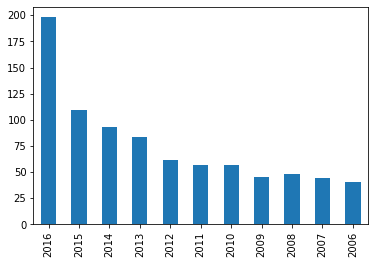

In [ ]:
movie_yearly_count.plot(kind='bar')


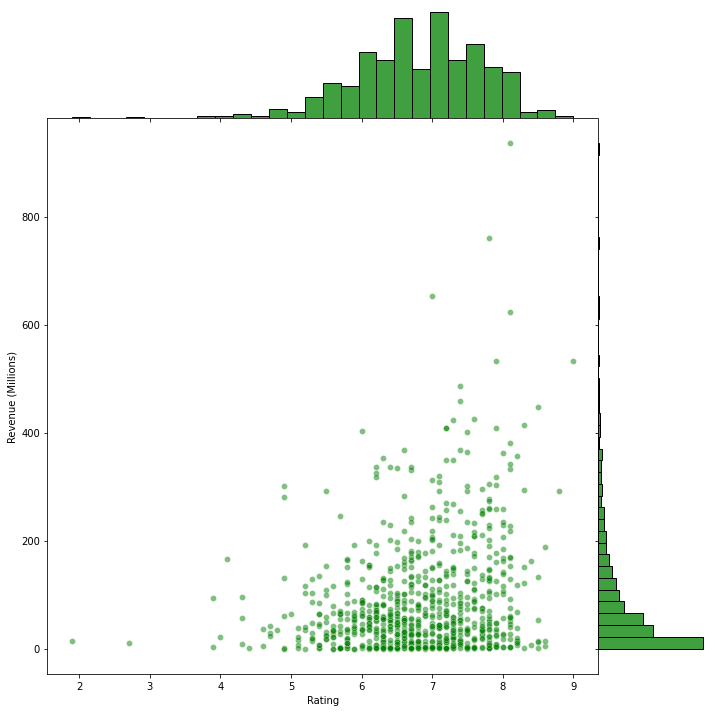

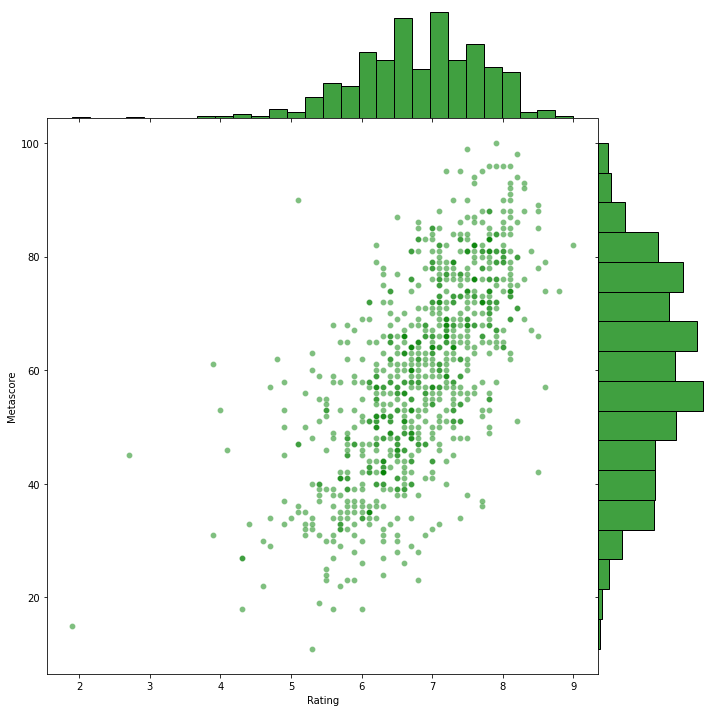

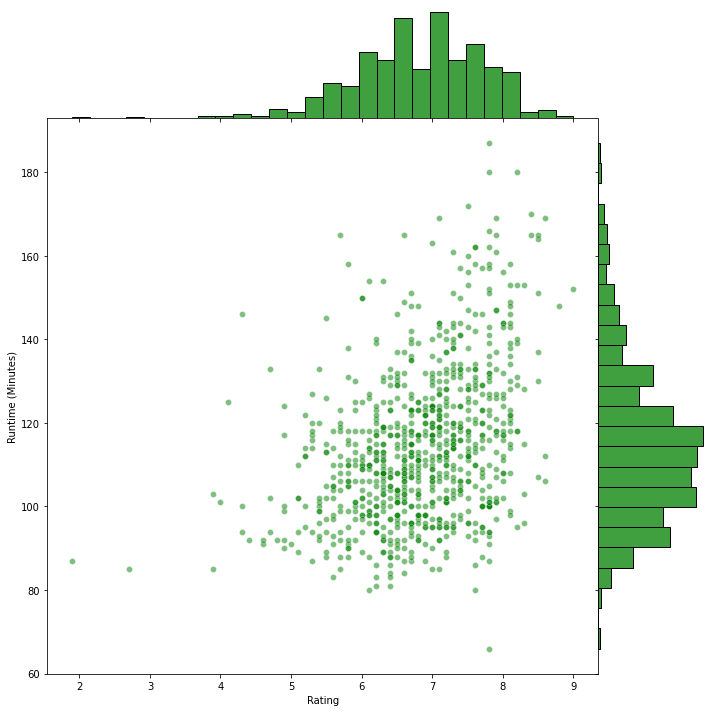

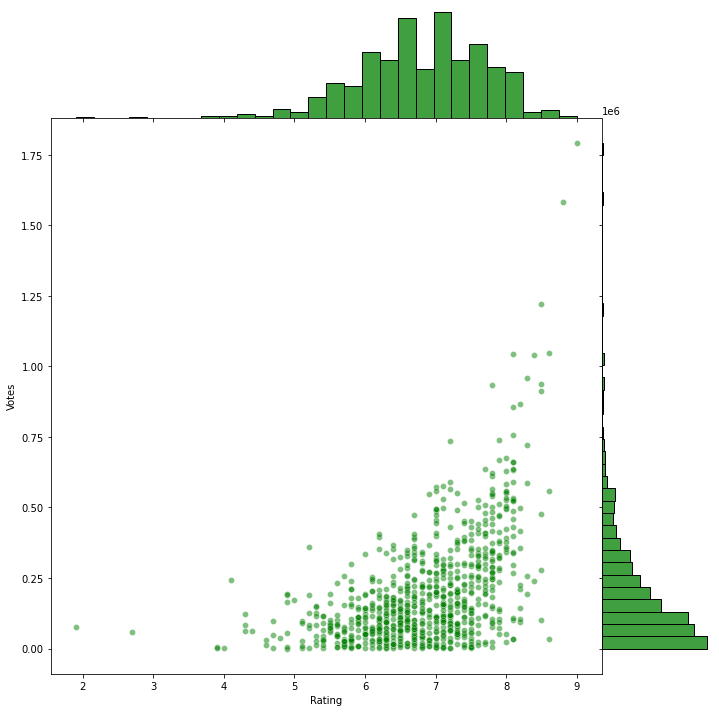

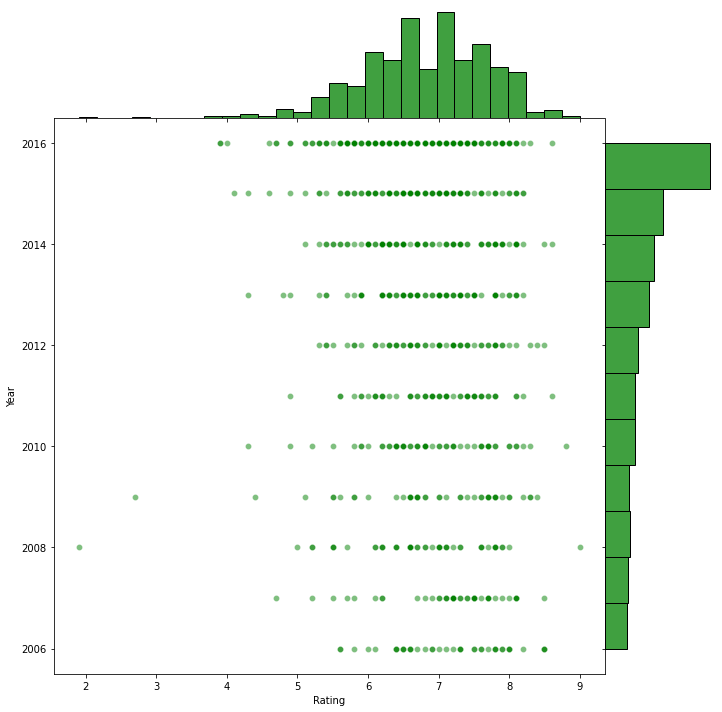

In [ ]:
movies_comparisons = ['Revenue (Millions)', 'Metascore', 'Runtime (Minutes)', 'Votes','Year']

for comparison in movies_comparisons:
    sns.jointplot(x='Rating', y=comparison, data=dataset, alpha=0.5, color='g', height=10, space=0)

In [ ]:
unique_genres = dataset['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

print(individual_genres)

{'Drama', 'Animation', 'Sport', 'Sci-Fi', 'Romance', 'Mystery', 'Fantasy', 'Biography', 'Western', 'Family', 'History', 'Horror', 'War', 'Comedy', 'Adventure', 'Musical', 'Music', 'Thriller', 'Action', 'Crime'}


Number of movies in each genre:
Drama 419
Animation 45
Sport 15
Sci-Fi 107
Romance 120
Mystery 86
Fantasy 92
Biography 67
Western 4
Family 48
History 25
Horror 87
War 10
Comedy 250
Adventure 244
Musical 5
Music 20
Thriller 148
Action 277
Crime 126


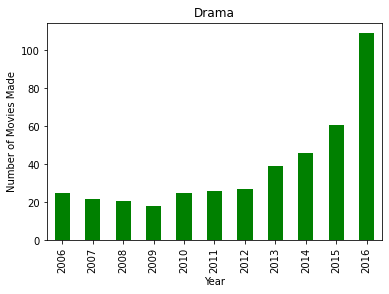

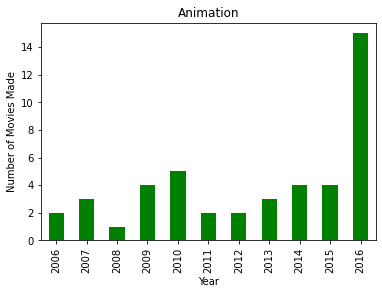

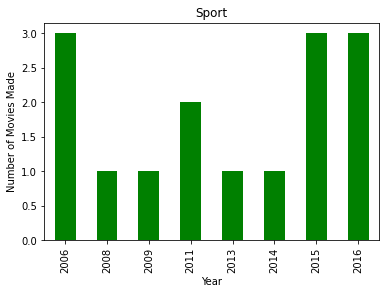

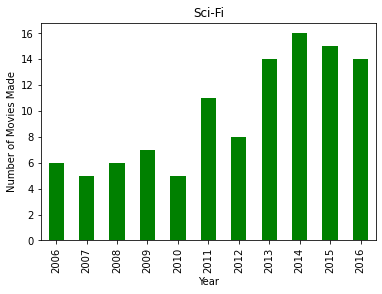

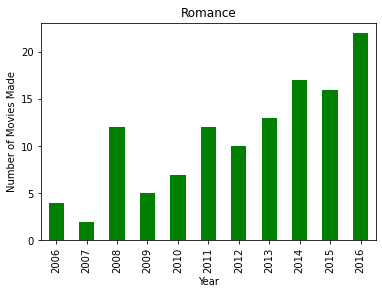

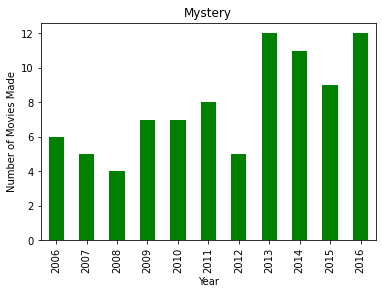

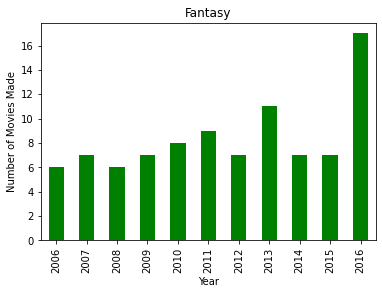

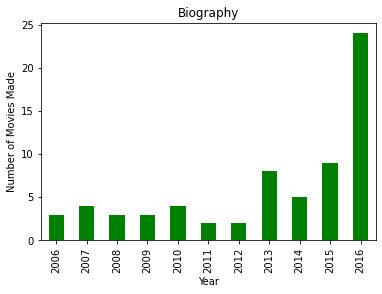

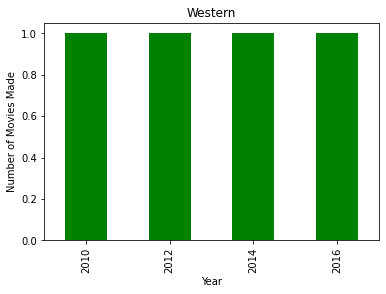

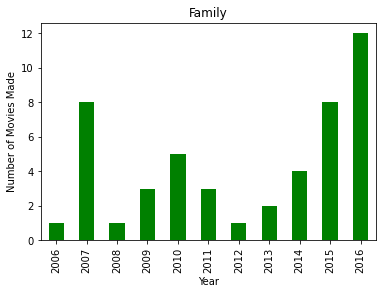

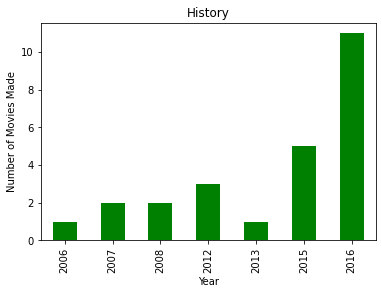

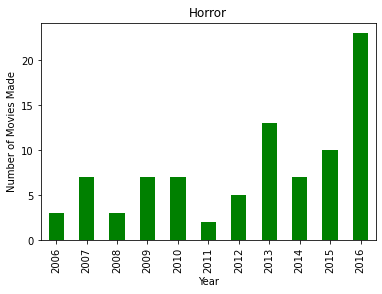

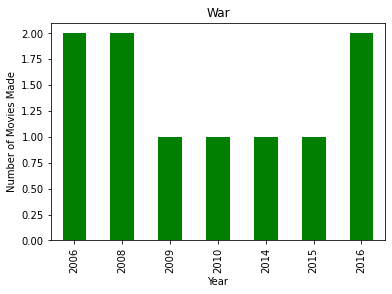

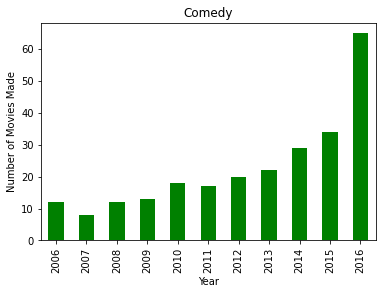

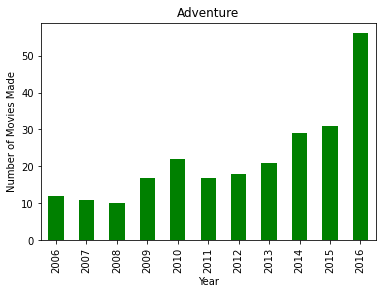

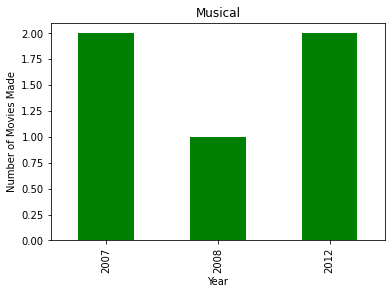

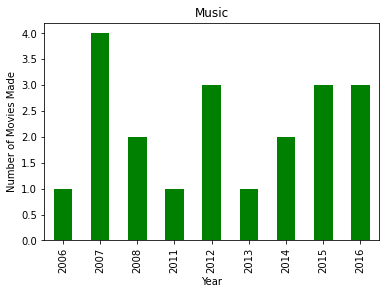

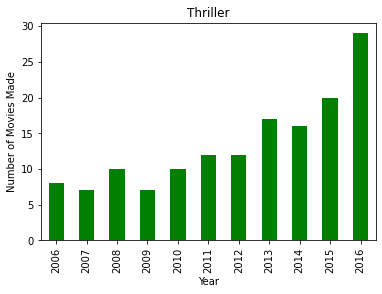

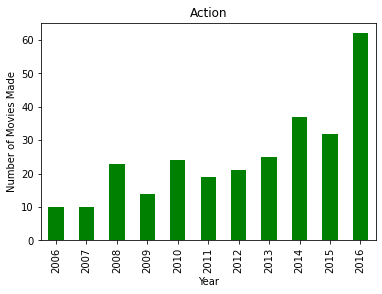

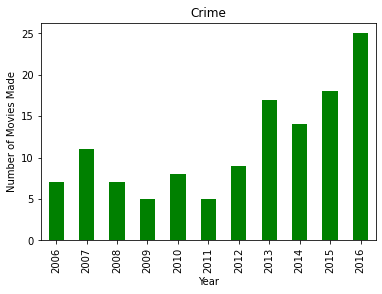

In [ ]:
print('Number of movies in each genre:')

for genre in individual_genres:
    current_genre = dataset['Genre'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    dataset[current_genre].Year.value_counts().sort_index().plot(kind='bar', color='g')
    print(genre, len(dataset[current_genre]))

Text(0.0, 1.0, 'Voting VS Rating')

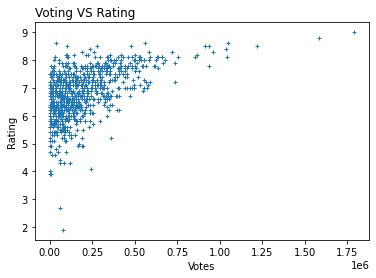

In [ ]:
plt.plot( 'Votes', 'Rating', data=dataset, linestyle='', marker='+', markersize=4)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Voting VS Rating', loc='left')

In [ ]:
dataset['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Action,Comedy,Horror        1
Action                      1
Action,Thriller,War         1
Action,Fantasy,War          1
Action,Drama,Mystery        1
Name: Genre, Length: 189, dtype: int64

In [ ]:
dataset['Director'].value_counts()

Ridley Scott          8
David Yates           6
Michael Bay           6
Paul W.S. Anderson    6
Justin Lin            5
                     ..
Wally Pfister         1
Lee Unkrich           1
Mia Hansen-Løve       1
Hannes Holm           1
Olivier Megaton       1
Name: Director, Length: 524, dtype: int64

In [ ]:
data=[dataset]
data_mapping={'Action,Adventure,Sci-Fi':0,       
'Drama':1,                         
'Comedy,Drama,Romance':2,          
'Comedy':3,                        
'Drama,Romance':4,                 
'Comedy,Drama':5,                  
'Animation,Adventure,Comedy ':6,   
'Action,Adventure,Fantasy':7,      
'Comedy,Romance':8,                
'Crime,Drama,Thriller':9,          
'Crime,Drama,Mystery':10,           
'Action,Adventure,Drama':11,        
'Action,Crime,Drama':12,            
'Horror,Thriller':13,               
'Drama,Thriller':14,                
'Biography,Drama':15,               
'Biography,Drama,History':16,       
'Action,Adventure,Comedy':17,       
'Adventure,Family,Fantasy':18,      
'Action,Crime,Thriller':19,         
'Action,Comedy,Crime':20,           
'Horror':21,                        
'Action,Adventure,Thriller':22,     
'Crime,Drama':23,                   
'Action,Thriller':24,                
'Animation,Action,Adventure':25,     
'Biography,Crime,Drama':26,          
'Thriller':27,                       
'Horror,Mystery,Thriller':28,        
'Biography,Drama,Sport':29}

for i in data:
    i['genre']=i['Genre'].map(data_mapping)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,4,8.1,757074,333.13,76.0,0.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,4,7.0,485820,126.46,65.0,NaN
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,3,7.3,157606,138.12,62.0,13.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,3,7.2,60545,270.32,59.0,NaN
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,4,6.2,393727,325.02,40.0,7.0


In [ ]:
common_value='0'
dataset['genre']=dataset['genre'].fillna(common_value)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset['Runtime (Minutes)'].value_counts().sort_index(ascending=True)

66     1
80     2
81     2
83     3
84     2
      ..
169    3
170    1
172    1
180    2
187    1
Name: Runtime (Minutes), Length: 90, dtype: int64

In [ ]:
dataset['Metascore'].describe()

     Rank                     Title  ... Metascore genre
0       1   Guardians of the Galaxy  ...      76.0   0.0
1       2                Prometheus  ...      65.0   NaN
2       3                     Split  ...      62.0  13.0
3       4                      Sing  ...      59.0   NaN
4       5             Suicide Squad  ...      40.0   7.0
..    ...                       ...  ...       ...   ...
993   994  Resident Evil: Afterlife  ...      37.0   NaN
994   995                 Project X  ...      48.0   3.0
996   997           Hostel: Part II  ...      46.0  21.0
997   998    Step Up 2: The Streets  ...      50.0   NaN
999  1000                Nine Lives  ...      11.0   NaN

[838 rows x 13 columns]


In [ ]:
for j in data:
    j['Runtime (Minutes)']=j['Runtime (Minutes)'].astype(int)
    j.loc[ j['Runtime (Minutes)'] <= 66, 'Runtime (Minutes)'] = 1
    j.loc[(j['Runtime (Minutes)'] > 66) & (j['Runtime (Minutes)'] <= 90), 'Runtime (Minutes)'] = 2
    j.loc[(j['Runtime (Minutes)'] > 90) & (j['Runtime (Minutes)'] <= 120), 'Runtime (Minutes)'] = 3
    j.loc[(j['Runtime (Minutes)'] > 120) & (j['Runtime (Minutes)'] <= 140), 'Runtime (Minutes)'] = 4
    j.loc[(j['Runtime (Minutes)'] > 140) & (j['Runtime (Minutes)'] <= 160), 'Runtime (Minutes)'] = 5
    j.loc[(j['Runtime (Minutes)'] > 160) & (j['Runtime (Minutes)'] <= 180), 'Runtime (Minutes)'] = 6
    j.loc[j['Runtime (Minutes)'] > 180, 'Runtime (Minutes)']=7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
dataset['Runtime (Minutes)'].describe()

count    838.000000
mean       3.375895
std        0.809585
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Runtime (Minutes), dtype: float64

In [ ]:
dataset.loc[:,['Runtime (Minutes)','Year','genre','Metascore','Votes']]


,Runtime (Minutes),Year,genre,Metascore,Votes
0,4,2014,0,76.0,757074
1,4,2012,0,65.0,485820
2,3,2016,13,62.0,157606
3,3,2016,0,59.0,60545
4,4,2016,7,40.0,393727
...,...,...,...,...,...
993,3,2010,0,37.0,140900
994,2,2012,3,48.0,164088
996,3,2007,21,46.0,73152
997,3,2008,0,50.0,70699


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X=dataset.loc[:,['Runtime (Minutes)','Year','genre','Metascore','Votes']]
y=dataset['Rating']

In [ ]:
X = X.values.astype(np.float)
y = y.values.astype(np.float)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train)

[[4.00000e+00 2.01000e+03 0.00000e+00 6.10000e+01 1.27983e+05]
 [3.00000e+00 2.01100e+03 2.30000e+01 7.80000e+01 4.61509e+05]
 [3.00000e+00 2.01300e+03 0.00000e+00 8.10000e+01 1.99813e+05]
 ...
 [3.00000e+00 2.00700e+03 0.00000e+00 7.80000e+01 2.21858e+05]
 [3.00000e+00 2.01400e+03 0.00000e+00 4.80000e+01 2.37887e+05]
 [5.00000e+00 2.00700e+03 0.00000e+00 6.10000e+01 5.31112e+05]]


In [ ]:
# Linear Regression
model_lnr=LinearRegression()
model_lnr.fit(X_train,y_train)
y_predict=model_lnr.predict(X_test)
print(r2_score(y_test, y_predict))
model_lnr.predict([[120,2019,1,75,757074]])

0.6156710017423204


array([23.84926172])

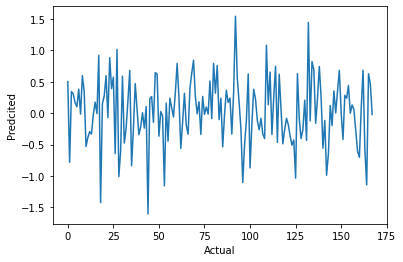

In [ ]:
plt.xlabel("Actual")
plt.ylabel("Predcited")
plt.plot(y_test - y_predict)

In [ ]:
# Random Forrest
from sklearn.ensemble import RandomForestRegressor
model_RN=RandomForestRegressor(n_estimators=13)
model_RN.fit(X_train,y_train)
y_predict2=model_RN.predict(X_test)
r2_score(y_test,y_predict2)


0.5083816838815407

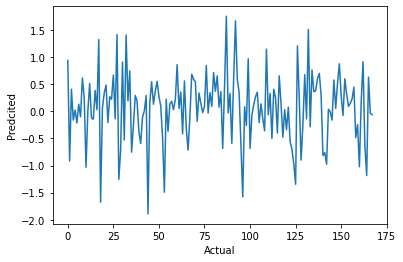

In [ ]:
plt.xlabel("Actual")
plt.ylabel("Predcited")
plt.plot(y_test - y_predict2)